In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
# Project Name: Topic Modeling of News Articles
# Description:
# In this Project I'll take a set of Articles, and categorized them to topics using two methods:
# 1. Latent Dirichlet Allocation (LDA)
# 2. Non-Negative Matrix Factorization (NMF) 

# Table of Contents
# 1. Latent Dirichlet Allocation (LDA):
# 1.1 We Load the data and using scikit learn we conduct count vectorization.
# We also filter out words appearing in more than 90% of the documents words appearing in one document only. 
# 1.2 We fit the data to the LDA
# 1.3 After LDA is done we look at the top words in each of the concluded clusters and give it a topic title
# 1.4  For each document, LDA returns a probability vector of how likely the text belongs to each topic, so we assign a topic to each document
# 1.5 After we classify each category we look at the confusion matrix

# 2. NMF (Non Negative Matrix Factorization)
# 2.1 We vectorize the texts using Tf-idf
# 2.2 We fit the data to the NMF
# 2.3 After NMF is done we look at the top words in each of the concluded clusters and give it a topic title
# 2.4 The second matrix of the NMF scores how likely a certain document belongs to a topic, so now we assign a topic for each document
# 2.5 After we classify each category we look at the confusion matrix
# We exclude the Entertainment category since it was not identified


### Project Name: Topic Modeling of News Articles

#### Description
In this project, I'll take a set of articles and categorize them into topics using two methods:  
1. **Latent Dirichlet Allocation (LDA)**  
2. **Non-Negative Matrix Factorization (NMF)**  
---

#### Table of Contents

##### 1. Latent Dirichlet Allocation (LDA)
1.1. Load the data and perform **Count Vectorization** using scikit-learn.  
We filter out words appearing in more than 90% of documents or in only one document.  
1.2. Fit the data to the **LDA model**.  
1.3. After LDA is done, we look at the top words in each cluster and assign a **topic title**.  
1.4. For each document, LDA returns a probability vector of how likely the text belongs to each topic; assign a topic to each document.  
1.5. After classification, examine the **confusion matrix**.

##### 2. NMF (Non-Negative Matrix Factorization)
2.1. Vectorize the texts using **TF-IDF**.  
2.2. Fit the data to the **NMF model**.  
2.3. After NMF is complete, examine the top words in each cluster and assign a **topic title**.  
2.4. The second matrix of NMF scores how likely a document belongs to a topic; assign a topic to each document.  
2.5. After classification, examine the **confusion matrix**.  



### 📚 Data

The data used is from the website: [News Articles Categorization Dataset](https://huggingface.co/datasets/valurank/News_Articles_Categorization)


In [20]:
# 1. Latent Dirichlet Allocation (LDA)
# 1.1 We Load the data and using scikit learn we conduct count vectorization.

In [22]:
df  = pd.read_csv('valurank_News_Articles_Categorization.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3722 non-null   int64 
 1   Text        3722 non-null   object
 2   Category    3722 non-null   object
dtypes: int64(1), object(2)
memory usage: 87.4+ KB


In [25]:
# We create a count vectorizer to count the document-term frequency  

cv = CountVectorizer(max_df=0.9,min_df=2, stop_words='english')

In [27]:
dtm = cv.fit_transform(df['Text'])

In [28]:
df.Category.value_counts()

World            575
Entertainment    485
science          482
Health           467
Business         461
Sports           454
Politics         442
Tech             356
Name: Category, dtype: int64

In [ ]:
# 1.2 We fit the data to the LDA

In [29]:
LDA = LatentDirichletAllocation(n_components=8,random_state = 42)

In [30]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=8, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [101]:
# Each LDA run is not identical, we load here my pretrained model
LDA = joblib.load("LDA_Model.pkl")

In [102]:
### 1.3 After LDA is done we look at the top words in each of the concluded clusters and give it a topic title

In [104]:
# Uncomment here to see top words from each topic 
# for i,t in enumerate(LDA.components_):
#     print(f'top 20 for topic {i}')
#     print([cv.get_feature_names()[i] for i in t.argsort()[-20:]])
#     print('\n')
#     print('\n')

In [ ]:
topic_map = {0:'Politics',1:'Sports',2:'Business',3:'World',4:'Health',5:'science',6:'Tech',7:'science'}

In [ ]:
# 1.4  For each document, LDA returns a probability vector of how likely the text belongs to each topic, so we assign a topic to each document

In [36]:
topic_results = LDA.transform(dtm)

In [37]:
df['topic_results'] = topic_results.argmax(axis = 1)

In [48]:
df.Category.value_counts()

World            575
Entertainment    485
science          482
Health           467
Business         461
Sports           454
Politics         442
Tech             356
Name: Category, dtype: int64

In [43]:
df['LDA_topic'] = df['topic_results'].map(topic_map)

In [ ]:
# 1.5 After we classify each category we look at the confusion matrix
# Since LDA did not recognize an 'Entertainment cluster',
# and instead made 2 science clusters we will filter out the 'Entertainment' cluster from the data
# and see the success of the LDA in the other topics

In [50]:
df2= df[df['Category']!= 'Entertainment'] 
df2.reset_index(inplace = True)

In [55]:
df2.Category.value_counts()
df2.LDA_topic.value_counts()

Politics    522
Business    508
Health      507
World       505
science     492
Sports      362
Tech        341
Name: LDA_topic, dtype: int64

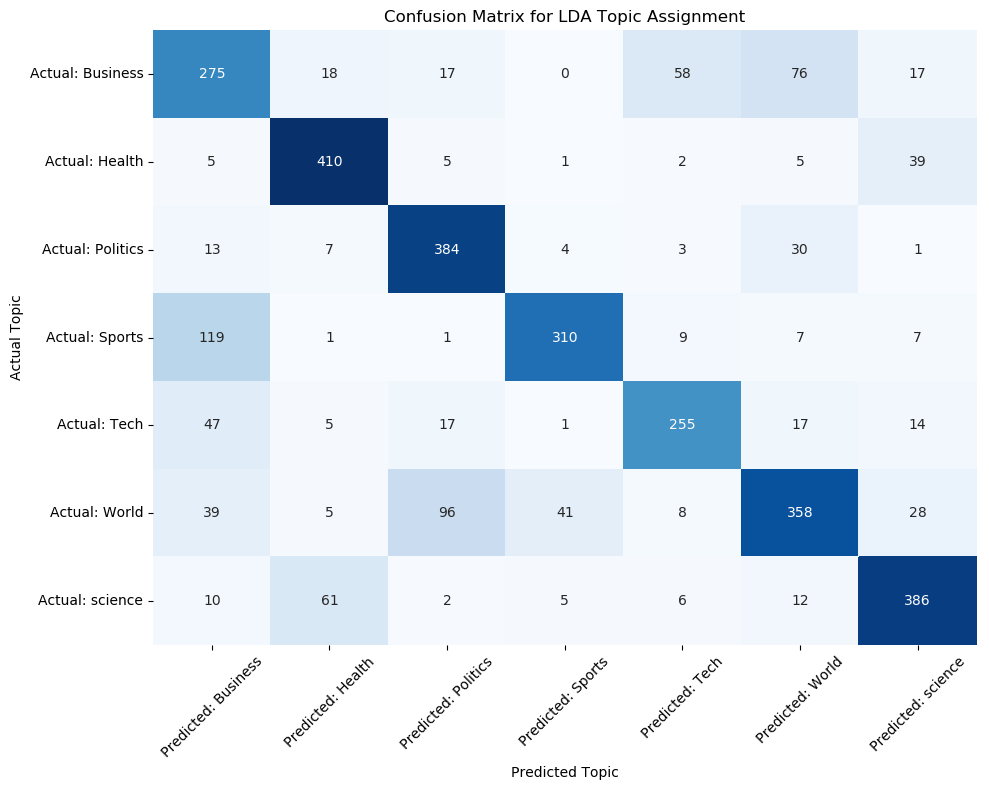

📊 Classification Report:

              precision    recall  f1-score   support

    Business       0.54      0.60      0.57       461
      Health       0.81      0.88      0.84       467
    Politics       0.74      0.87      0.80       442
      Sports       0.86      0.68      0.76       454
        Tech       0.75      0.72      0.73       356
       World       0.71      0.62      0.66       575
     science       0.78      0.80      0.79       482

   micro avg       0.73      0.73      0.73      3237
   macro avg       0.74      0.74      0.74      3237
weighted avg       0.74      0.73      0.73      3237



In [57]:
# Confusion Matrix 

# Define columns
true_col = 'Category'
pred_col = 'LDA_topic'

# Ensure both columns are strings (in case they were object or mixed types)
df2[true_col] = df2[true_col].astype(str)
df2[pred_col] = df2[pred_col].astype(str)

# Get sorted list of all unique topics from both columns
all_topics = sorted(set(df2[true_col].unique()).union(set(df2[pred_col].unique())))

# Generate confusion matrix 
cm = confusion_matrix(df2[true_col], df2[pred_col], labels=all_topics)

# Create DataFrame for heatmap
cm_df = pd.DataFrame(cm,
                     index=[f"Actual: {label}" for label in all_topics],
                     columns=[f"Predicted: {label}" for label in all_topics])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for LDA Topic Assignment")
plt.ylabel("Actual Topic")
plt.xlabel("Predicted Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Classification report
print("📊 Classification Report:\n")
print(classification_report(df2[true_col], df2[pred_col], labels=all_topics, target_names=all_topics))


In [ ]:
# 2 NMF (Non Negative Matrix Factorization)
# 2.1 We vectorize the texts using Tf-idf and filter words that appear in more than 90% of the decomuents, and ones that appear in less than one document

In [105]:
df  = pd.read_csv('valurank_News_Articles_Categorization.csv')

In [107]:
tfidf = TfidfVectorizer(max_df = 0.9, min_df = 2, stop_words='english') 

In [108]:
dtm = tfidf.fit_transform(df['Text'])

In [109]:
# 2.2 We fit the data to the NMF
# The NMF creates 2 matrixes, one that gives a score to each word relatively to a topic
# the other gives describe how likely a certain document belongs to a topic
# In the first matrix we look at the words with the highest values to understand which topics were discovered

In [110]:
nmf = NMF(n_components=8, random_state=42)

In [111]:
nmf.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [ ]:
# 2.3 After NMF is done we look at the top words in each of the concluded clusters and give it a topic title

In [113]:
# Uncomment here to see top words from each topic 
# for index, topic in enumerate(nmf.components_):
#     print(f"top 15 words for topic {index}")
#     print([tfidf.get_feature_names()[i] for i in topic.argsort()[-30:]])
#     print('\n')

In [90]:
df2 = df.copy()

In [69]:
# Note that the NMF also did not recognize the Entertainment category, and splited health to 2:
# Health and covid

In [91]:
topic_map2 = {0:'Politics',1:'Health',2:'Tech',3:'Sports',4:'World',5:'Health',6:'Business',7:'science'}

In [ ]:
# 2.4 The second matrix of the NMF scores how likely a certain document belongs to a topic, so now we assign a topic for each document

In [92]:
topic_results2 = nmf.transform(dtm)

In [95]:
df2['NMF_topic'] = topic_results2.argmax(axis = 1)

In [96]:
df2['NMF_topic'] = df2['NMF_topic'].map(topic_map2)

In [97]:
df2.head()

,Unnamed: 0,Text,Category,NMF_topic
0,0,"Elon Musk, Amber Heard Something's Fishy On Wr...",Entertainment,Sports
1,1,Scientists are developing more than 100 corona...,science,Health
2,2,Jared Fogle Shut Down By Judge In Bid for Earl...,Entertainment,Politics
3,3,The agency had come under fire from members of...,Health,Health
4,4,"Credit...Jim Wilson/The New York TimesJune 30,...",Politics,Politics


In [ ]:
# 2.5 After we classify each category we look at the confusion matrix
# We exclude the Entertainment category since it was not identified

In [98]:
df2 = df2[df2['Category'] != 'Entertainment']

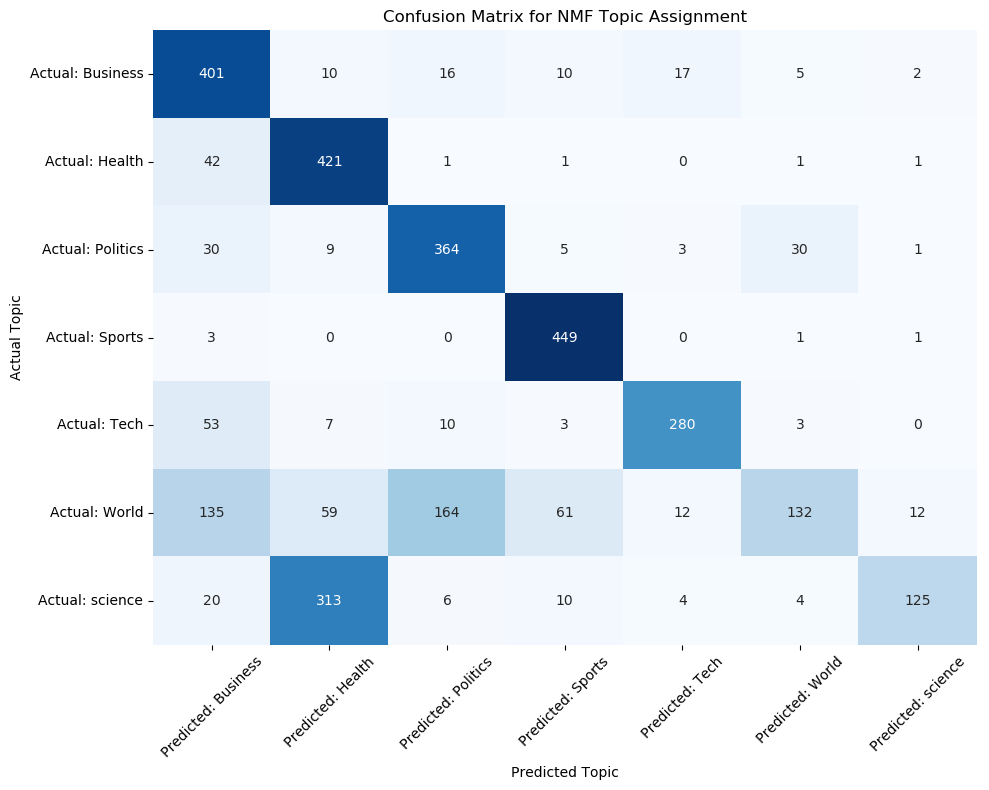

📊 Classification Report:

              precision    recall  f1-score   support

    Business       0.59      0.87      0.70       461
      Health       0.51      0.90      0.65       467
    Politics       0.65      0.82      0.73       442
      Sports       0.83      0.99      0.90       454
        Tech       0.89      0.79      0.83       356
       World       0.75      0.23      0.35       575
     science       0.88      0.26      0.40       482

   micro avg       0.67      0.67      0.67      3237
   macro avg       0.73      0.69      0.65      3237
weighted avg       0.72      0.67      0.63      3237



In [100]:
# Confusion Matrix 

# Define columns
true_col = 'Category'
pred_col = 'NMF_topic'

# Ensure both columns are strings (in case they were object or mixed types)
df2[true_col] = df2[true_col].astype(str)
df2[pred_col] = df2[pred_col].astype(str)

# Get sorted list of all unique topics from both columns
all_topics = sorted(set(df2[true_col].unique()).union(set(df2[pred_col].unique())))

# Generate confusion matrix 
cm = confusion_matrix(df2[true_col], df2[pred_col], labels=all_topics)

# Create DataFrame for heatmap
cm_df = pd.DataFrame(cm,
                     index=[f"Actual: {label}" for label in all_topics],
                     columns=[f"Predicted: {label}" for label in all_topics])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for NMF Topic Assignment")
plt.ylabel("Actual Topic")
plt.xlabel("Predicted Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Classification report
print("📊 Classification Report:\n")
print(classification_report(df2[true_col], df2[pred_col], labels=all_topics, target_names=all_topics))
